In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
data = pd.read_csv("car_price_prediction (2).csv")
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
print("Shape:",data.shape)
print("\n Columns:",data.columns)
data.info()

Shape: (19237, 18)

 Columns: Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           1923

In [4]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [81]:
data = data.drop('ID', axis=1)
data=data.drop('Doors',axis=1)
data=data.drop('Model',axis=1)

KeyError: "['ID'] not found in axis"

In [82]:
data.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Wheel               0
Color               0
Airbags             0
dtype: int64

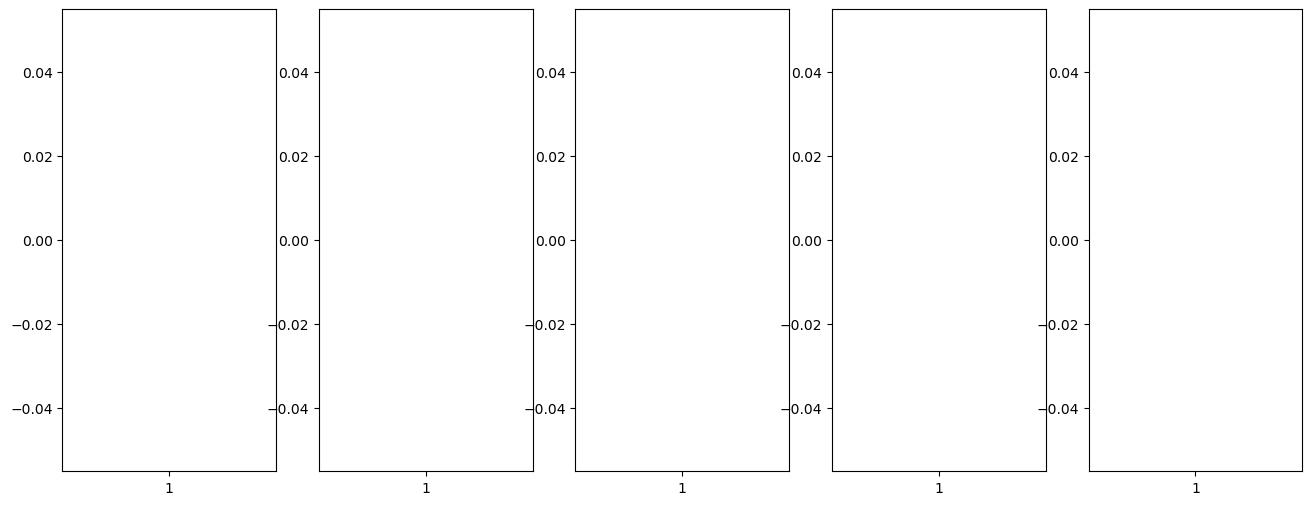

In [85]:
fig,axs=plt.subplots(1,5,figsize=(16,6))
axs[0].boxplot(data['Prod. year'] )
axs[1].boxplot(data['Mileage'])
axs[2].boxplot(data['Cylinders'] )
axs[3].boxplot(data['Airbags'])
axs[4].boxplot(data['Engine volume'])
plt.show()


In [13]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return lower, upper, outliers

In [14]:
numeric_cols = ["Price", "Levy", "Engine volume", "Mileage", "Cylinders"]

for col in numeric_cols:
    lower, upper, outliers = find_outliers_iqr(data, col)
    print(f"\nColumn: {col}")
    print(f"Lower Limit: {lower}")
    print(f"Upper Limit: {upper}")
    print(f"Outliers Count: {outliers.shape[0]}")


Column: Price
Lower Limit: -19785.0
Upper Limit: 47191.0
Outliers Count: 1073

Column: Levy
Lower Limit: 449.5
Upper Limit: 1197.5
Outliers Count: 3151

Column: Engine volume
Lower Limit: 0.7500000000000002
Upper Limit: 3.55
Outliers Count: 1381

Column: Mileage
Lower Limit: -107984.5
Upper Limit: 367011.5
Outliers Count: 640

Column: Cylinders
Lower Limit: 4.0
Upper Limit: 4.0
Outliers Count: 4870


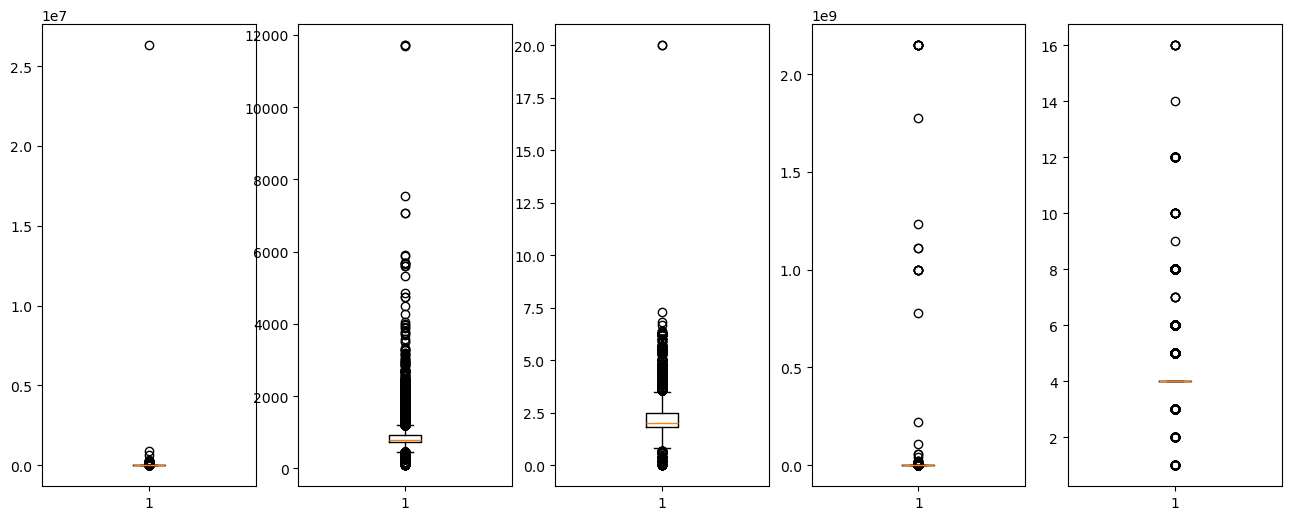

In [16]:
fig,axs=plt.subplots(1,5,figsize=(16,6))
axs[0].boxplot(data['Price'] )
axs[1].boxplot(data['Levy'])
axs[2].boxplot(data['Engine volume'] )
axs[3].boxplot(data['Mileage'])
axs[4].boxplot(data['Cylinders'])
plt.show()

In [76]:
Q1 = data.select_dtypes(include="number").quantile(0.25)
Q3 = data.select_dtypes(include="number").quantile(0.75)
IQR = Q3 - Q1

dataa = data[~((data.select_dtypes(include="number") < (Q1 - 1.5*IQR)) | 
          (data.select_dtypes(include="number") > (Q3 + 1.5*IQR))).any(axis=1)]

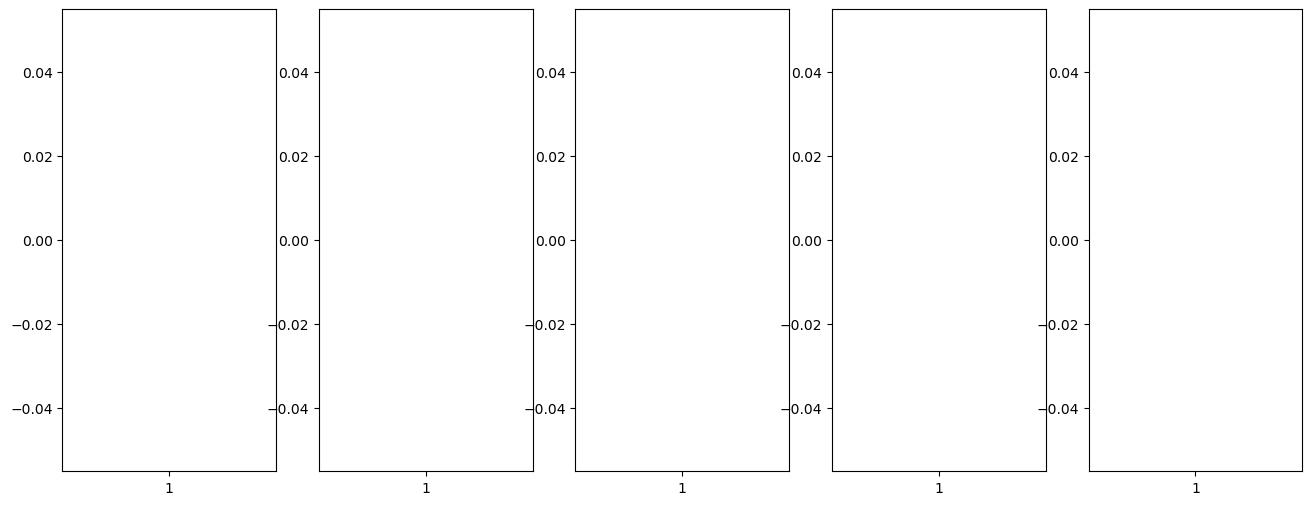

In [77]:
fig,axs=plt.subplots(1,5,figsize=(16,6))
axs[0].boxplot(dataa['Price'] )
axs[1].boxplot(dataa['Levy'])
axs[2].boxplot(dataa['Engine volume'] )
axs[3].boxplot(dataa['Mileage'])
axs[4].boxplot(dataa['Cylinders'])
plt.show()

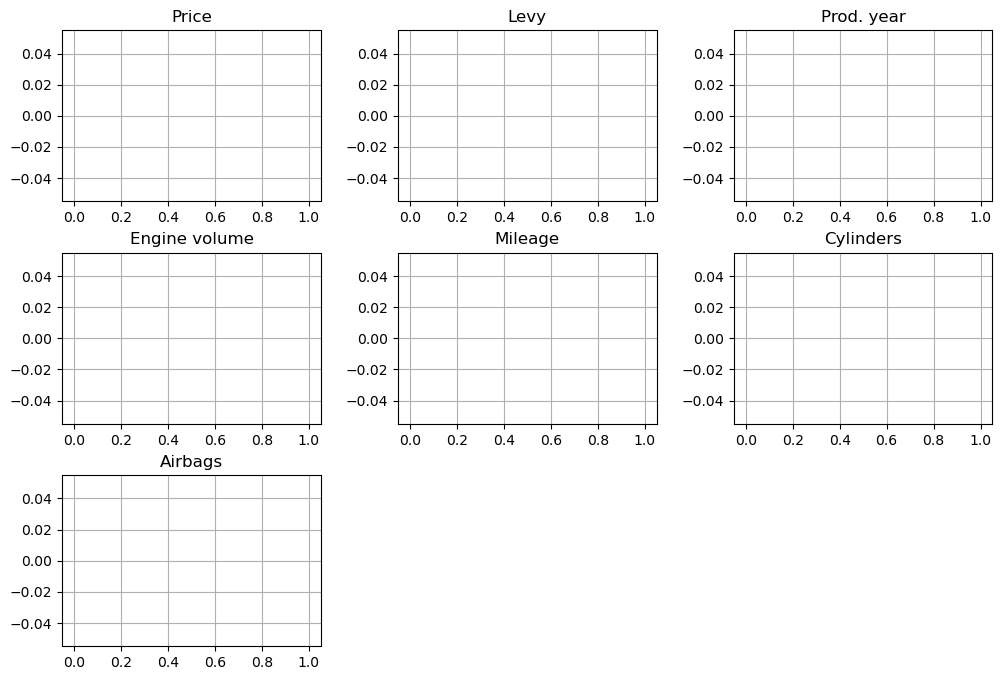

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
data.hist(figsize=(12,8))
plt.show()